# Sketching a hypothesis


I assume you have a fair idea about data exploration or you have gone through the recommended article. In both the cases you are ready to go ahead and mesh around with data.
Well, my approach in this article is to take a real life problem and analyse it. As usual, we will have a problem statement and a data set. We will try to generate a hypothesis which provides some sort of understanding of data set.
The reason behind my approach is that in my belief problem solving is the best possible way to learn something. So, let's go ahead and have fun.

Problem Statement: You are given a data set of number of dengue cases reported during different periods of times in two cities San Juan and Iquitos. Generate a hypothesis which relates the total number of cases to possible variables. 

Note that this statement is not the problem statement generally given in problems. I have framed it specifically for data exploration task. 

Now, there are several possible approaches varying person to person. For example, someone looks at the data first and makes plots and tables to end up with some hypothesis. Someone else could go around the problem by applying some machine learning algorithm and from the results, he/she could roughly infer the importance of variables and what is going on there. A third person could first generate a hypothesis based on prior knowledge and intuition about the problem and could prove or disprove his/her assumptions later with the help of data. This list should go on and on and on. Are you wondering about my approach? Well, I will definitely disclose it but before that, let me give you some intuition why I prefer this approach.

Suppose you have planned to attend an information packed meetup organized by Analytics Vidhya. Now, you would definitely want to make maximum out of it. Here comes the real question- HOW? 
A very genuine answer should be that I will try to understand whatever the speaker has to tell and will ask doubts if any. Apart from this, I should have a list of expected informations even before I step into the meetup hall. In case the speaker doesn't quote about those topics, I should ask him/her explicitly. But, next few points to ponder is that how should I get that list of questions. Will I ask random questions? Doesn't make any sense. Would I be able to understand all the information the speaker is going to deliver and make sense out of it at the moment? The final question is - What should I do to overcome these problems? And the answer is pretty simple and straight forward. Do enough home work on the topic and sketch a rough outline of the expected structure of talk. If some one attends an information packed session without proper home work on topic, all he/she will get out of it is notes of lecture delivered by speaker. The reason behind it is in case we are blank about topic, our mind flows in the direction of talk and is unable to think out of the information provided by speaker. 
Now, try to relate it our situtaion. The speaker is our data set and the questions I am talking about is our hypothesis. If we directly jump upon data, we are generally unable to think anything else other than the variables in the data and information in the plots. 
So, my approach in this article should be to first generate hypothesis based on my prior knowledge about dengue and will prove or disprove later it if possible. Note that the hypothesis I am talking about should be generated before we look at the data. This approach of exploration is very common in industry. Analysts do a lots of brain storming to generate a hypothesis before they actually look at the data for the first time. 
After the introduction to approach, let me introduce Dengue. Obviously, you will need a more extensive reasearch on the topic to generate a hypothesis.  
Dengue is a mosquito borne viral-disease occuring in tropical and su-tropical regions. It is spread by several species of mosquito of Aedes type.Humans are the primary host of the virus. Dengue can be life threatening in some cases and has been a global problem since world war 2. Millions of people get infected by Dengue each year. 
Based on our prior knowledge, let's try to generate a hypothesis. Please note that the purpose of the hypothesis generation is to illustrate the process of data exploration and not to provide you a scientifically correct hypothesis. 
There are two key links which cause Dengue - mosquito and virus. Wherever the most favourable situation will be available, number of cases reporetd should be high. Note that, I have used word 'should' because there are other possible factors. Also, it is not complusory that wherever the situation is favourable, Dengue cases must happen. Apart from this, geographical conditions, socio-economic state of the city and even race are factors.Based on these assumptions, I have created a hypothesis which is listed below. You too can think of other points or can generate complete hypothesis on your own. 

1. More the temperature at a place, higher should be the number of cases. Some papers suggest that high temperature is favourable for Dengue virus.
2. Greater the change in climate, more should be the number of cases. 
3. Greater the rain, higher will be possibility of water logging. More water logging leads to increase in number of mosquitoes which should ultimately lead to higher number of cases.
4. Higher the population density, more should be the number of cases.
5. Vegetation provides shelter to the mosquitoes. So, higher vegetation should lead to larger number of cases.
6. If poverty is prevailant at the place, people should e unable to take enough care of themselves. Hence increase in poverty should lead to higher number of cases.
7. If people are un-educated at a place, it is more probable that they should be unaware of causes and precautions of Dengue and hence more prone to Dengue. 
8. In tropical regions, odds of Dengue are higher as suugested by some papers.
9. If the infrastructure in a city is inadequate, public will have lesser support to fight against Dengue and hence number of cases should increase.
10. Some of the papers suggets that people of black race are more resistant to Dengue. Hence, larger the fraction of black people in a city, smaller should be number of cases. 

Having noted down the hypothesis, it's time to verify our hypothesis if possible. Note that a data set can contain less,more or sufficient amount of information to verify a hypothesis. Go on through the article and you will be able make this observation later by yourself.

You should download the data set required for this problem from the link  https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/. Go through the problem statement and variable description thoroughly before starting the implementation. 
Now, let's get started with implementation. First of all, we will do the usual imports. Please note that if you get stuck with any function, google its documentation. It works in most of the cases. Also you can reach out to us by dropping your comments below.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

Next, we will read our data. I have my training features and target variable in different files. So, I will read the files in two different data frames and then will merge them to create the final data frame.

In [2]:
#read the fatures and labels data sets and merge them to get the final data set
df = pd.read_csv("C:/Users/HP/Desktop/dengue_features_train.csv")
lb =  pd.read_csv("C:/Users/HP/Desktop/dengue_labels_train.csv")
dg = pd.merge(df,lb,on=['city','year','weekofyear'])


We will start with an overview of the data.Have a look at the final data frame. .head()functions prints first 5 rows in the data set. To print more number of rows, pass the number as argument.

In [3]:
dg.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


After looking at data, can you figure out which points in our hypothesis can be verified y currently available features? Definitely yes. I mean, there is nothing very tough in it. Also, there are some points in our hypothesis which can not be proved or disproved atleast directly from the given variables in data frame. You have to derive new features or do some research from other sources to comment on them. I will illustrate the point later in the article.  Also, we can think of more points which did not strike to our mind at the time of hypothesis generation. For example-
11. As the humidity increases, conditions become favourable for vector mosquito. Hence, number of Dengue cases should grow with humidity.

After having an introduction about how the data frame looks like and what are the variables in the data set, let's dive deeper and see the statistics of the data to have a good overview about how the data is distributed and what are the central tendencies of different variables.

In [4]:
#statistics of different features in our data
dg.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


Note that .describe() function gives details about the numerical values only.There are seperate methods in python for treating categorical variables.

To begin with, we will have overview of target variable like how many cases had been reported per city,how many instances of each city are there in our data, in which of years number of cases are maximum and year wise distribution of total_cases. It will give us a fair idea about target variable. Later, we will dive deeper and look at the distribution and statistics of target variable.

In [5]:
#value_counts for categorical data
dg['city'].value_counts()


sj    936
iq    520
Name: city, dtype: int64

There are 936 instances of city San Juan and 520 of iquitos. 

In [6]:
dg.total_cases.groupby(dg.city).sum()

city
iq     3934
sj    31993
Name: total_cases, dtype: int64

Clearly,  San Juan has far more number of cases than Iquitos. Population density of San Juan in 2010 was 3275 per square kilometer and that of Iquitos was 444,10. But the data says that there are there are way high number of cases in San Juan than Iquitos. What could be the possible reason for such a contradiction. Have a look at the total population and geographical attributes of both the cities from internet and try finding out what's going wrong?

In [7]:
week_wise_sum = dg.total_cases.groupby(dg.weekofyear).sum()
week_wise_sum.sort_values(ascending=False)

weekofyear
40    1403
41    1385
42    1345
44    1325
45    1315
43    1256
39    1213
46    1164
47    1161
38    1109
48    1107
37    1105
36    1102
49    1021
35    1016
50     924
34     920
33     906
32     898
2      728
31     720
51     704
1      678
3      677
4      652
30     633
5      620
52     605
6      530
29     511
7      487
8      478
28     464
9      453
26     404
27     403
10     387
25     344
11     313
24     305
13     302
22     296
23     281
12     279
20     254
18     241
14     239
16     239
21     237
19     236
15     232
17     212
53     108
Name: total_cases, dtype: int64

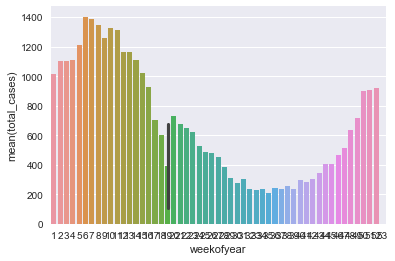

In [8]:
sns.barplot(dg.weekofyear,week_wise_sum)

You can clearly see that in weeks 39-46 or so, number of cases is very high. This may suggest that chances of Dengue are higher in a particular season and that season comes around the week 39-46.
Lets see if there was an epidemic in any year.We can do it with the help of .groupby() method. What the method does is that it groups the data in different parts according to the chosen variable. Now, if you perform any operation, it will run on each group.

In [9]:
#year wise sum of total_cases. observe that number of cases in 1998 is exceptionally high.
year_wise_sum=dg.total_cases.groupby(dg.year).sum()
year_wise_sum

year
1990     866
1991    2801
1992    2371
1993    1156
1994    6533
1995    1333
1996     855
1997    1454
1998    4595
1999    1633
2000     496
2001    1477
2002    1156
2003    1063
2004    1248
2005    2116
2006     986
2007    2334
2008     907
2009     324
2010     223
Name: total_cases, dtype: int64

If you notice, in year 1998 the number of cases were extremely high. Again, if you think there is a variable of particular interest,you can describe it separately as well. I will be avoiding doing so explicitly for each variable for obvious reasons.

Once done with this much insight of target variable and its statistics, the next step is to perform the univariate and multivariate analysis to see whether we were thinking in right direction or not. We will do it with the one of the simplest and easy to interpret tools i.e. histogram for univariate analysis. For bivariate analysis, I will use scatter plot. As far as feature selection is considered, I have chosen our target variable as the dependent variable corresponding to each independent variable. The underlying reason is that I want to see if that particular variable is controllling the output significantly and also if we can observe any interesting trend of relatiions. Normally when working on important business problems, bivariate analysis is performed between almost all the reasonable pairs of faetures for the best possible insight. 
I will mention the simple attributes and observations I can make in the plots. If you can observe something interesting, mention it in the comments.  Also, I will talk about how to detect outliers. Let's get started with our target variable 

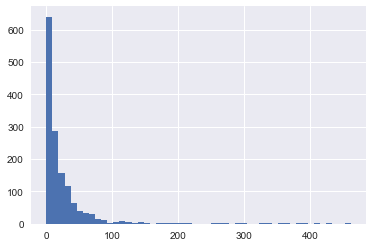

In [10]:

dg.total_cases.hist(bins=50)

In [11]:
dg.total_cases.describe()

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

You can see that the frequency of very large values of total_cases are pretty low which is reasonable. You can not expect a dengue epidemic each week. 

 After this warm up with target variable trend, we will go through each variable one by one and see if the variable relates to our hypothesis in any way and we can prove or disprove our hypothesis. I will start with vegetation index.  

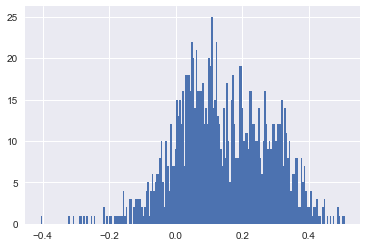

In [12]:

# the distribution is almost normal 
dg.ndvi_ne.hist(bins=200)

In [13]:
dg.ndvi_ne.describe()

count    1262.000000
mean        0.142294
std         0.140531
min        -0.406250
25%         0.044950
50%         0.128817
75%         0.248483
max         0.508357
Name: ndvi_ne, dtype: float64

After having an introduction to the distribution of data, let's see if we can infer anything from it or we can relate to our hypothesis.

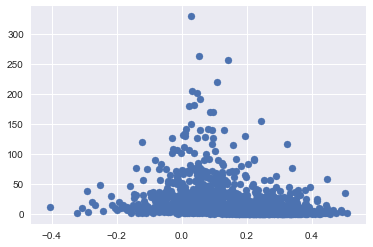

In [14]:

plt.scatter(dg['ndvi_ne'],dg['total_cases'])

Clearly, what we had assumed in our hypothesis is not completely true. Large values of total_cases are not corresponding to highest values of vegetation. Rather, they are corresponding to middle region of plot. It is definitely contrary to our hypothesis. Now, if you look at the histogram, you can see that most of the data points lie in the middle region.Also, number of cases are governed by other factors also. These can be  probable reason of failure of our hypothesis. Can you think about other reasons?

  As mentioned already, I will give you a rough idea about how to detect outliers in data set.
  There are certainly other sophisticated methods to detect outliers and selection of a method depends upon the problem wyou are solving. In our case, I will use boxplot.

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


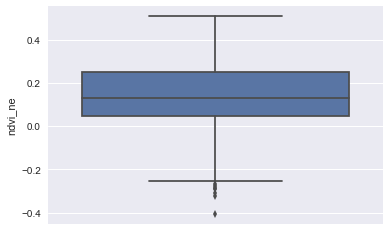

In [15]:
sns.boxplot(dg['ndvi_ne'],vert = True)

Sometimes, it is useful to observe the statistics of the feature to decide which values to declare an outlier. Go back and look at the description of ndvi_ne.

From the statistics and boxplot, I decided to declare the points whose value is less than -0.25 as outliers. You can chosse a threshhold whatever seems suitable to you in your case.

In [16]:
#in the boxplot, there are outliers in negative side.lets look at them
dg['ndvi_ne'][dg['ndvi_ne']<(-0.25)]

189   -0.29020
519   -0.28700
711   -0.26830
723   -0.40625
821   -0.30840
860   -0.27610
911   -0.25170
929   -0.32140
Name: ndvi_ne, dtype: float64

OK! Confused with the code? I will explain it for you. The first term in the code is just the column we want to operate on. The second piece is the condition i have chosen to decide whether a data point is an outlier or not.
Similarly, explore the other variables too. 

We have completed analysis of 'ndvi_ne' and should expect similar trend with each remaining vegetation index variable because all that is different between them is the geographical region corresponding to each one of them. So, we will be looking at the remaining ones superficially.

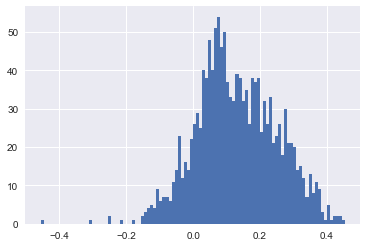

In [17]:

dg.ndvi_nw.hist(bins=100)

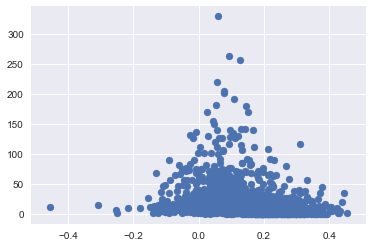

In [18]:

plt.scatter(dg['ndvi_nw'],dg['total_cases'])

Again there is no clear cut monotonous relationship which fails our hypothesis. Let's have a look at possible outlier.

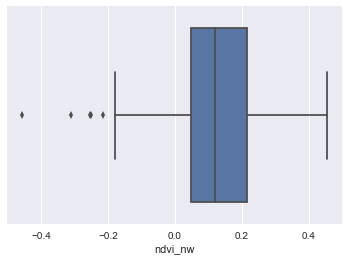

In [19]:

sns.boxplot(dg['ndvi_nw'])

clearly, there are 4 points which are far away from ridge of boxplot. Note that the rule I am using is not hard and fast. You can select your criteria depending upon situation. Let's put a threshhold to print them.

In [20]:

dg['ndvi_nw'][dg['ndvi_nw']<(-0.2)]

658   -0.2528
781   -0.2498
861   -0.4561
919   -0.3096
922   -0.2153
Name: ndvi_nw, dtype: float64

As both the variables ndvi_ne and ndvi_nw somehow represent vegetation in different areas, there may be correlation between them. Let's see if that is the case

In [21]:
dg['ndvi_ne'].corr(dg['ndvi_nw'],method='pearson',min_periods=None)

0.85090195130970359

There is a high correlation between both the variables. It suggests that both the variales should show more or less similar behaviour. Similar intuition can be felt for other variables also.

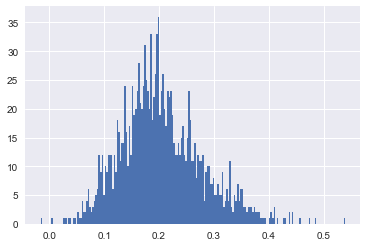

In [22]:
# The distibution is normal.
dg.ndvi_se.hist(bins=200)

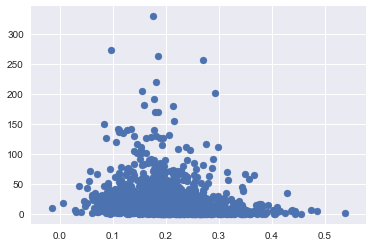

In [23]:


plt.scatter(dg['ndvi_se'],dg['total_cases'])

There is no clear cut monotonous relation between ndvi_se and total_cases. Hence failing our
hypothesis. There is one possible logic that most of the data points lie in the range 0.1 to 0.3 and hence there is probability that large number of cases could lie in the region. Try to think of other possible reasons. Infact, it should be a practice to think about 'WHY' whenever we disprove our hypothesis or encounter with an unexpected result.

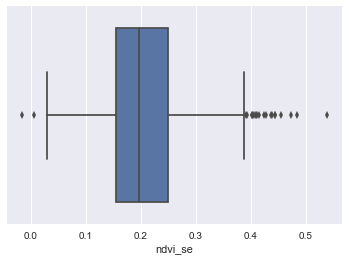

In [24]:
sns.boxplot(dg['ndvi_se'])

Boxplot clearly shows there are outliers. Again, the outliers can be due to different reasons and can tell different stories at times. 

In [25]:
#there are outliers on both side
dg['ndvi_se'][dg['ndvi_se']<0.02]
dg['ndvi_se'][dg['ndvi_se']>0.39]

544     0.393129
944     0.406714
948     0.404843
953     0.455380
1002    0.443800
1015    0.410267
1067    0.414929
1108    0.424943
1110    0.391214
1169    0.403112
1215    0.401986
1261    0.473400
1265    0.437743
1316    0.408700
1358    0.436914
1370    0.427686
1409    0.484286
1410    0.443357
1413    0.538314
1426    0.410614
Name: ndvi_se, dtype: float64

In [26]:
dg['ndvi_se'].corr(dg['ndvi_nw'],method='pearson',min_periods=None)

0.55580872944309734

Notice the correlation between ndvi_se and ndvi_nw. You can see that although both of the variables represent vegetation index, correlation between them is just 0.55 On the other hand, we got a correlation of 0.85 between ndvi_ne and ndvi_nw which led us to conclusion that vegetation variables should show similar trend. 
What I want to convey here is that looking at just one graph or table or statistics and saying infering blindly from it could lead us to fatal errors. You should try to verify an inference from each and every possible aspect. 

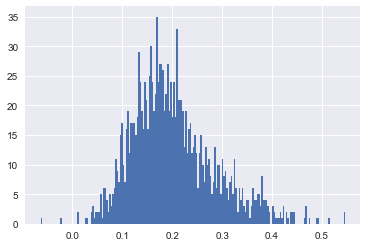

In [27]:
# We can treat the distribution as normal for application purpose.
dg.ndvi_sw.hist(bins=200)

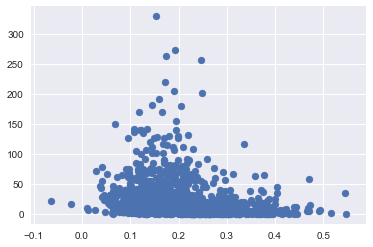

In [28]:
#there is no clear cut co-relation between ndvi_sw and total_cases.
plt.scatter(dg['ndvi_sw'],dg['total_cases'])

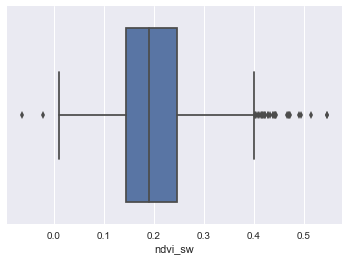

In [29]:
sns.boxplot(dg['ndvi_sw'])

In [30]:
#again there are outliers on both sides
dg['ndvi_sw'][dg['ndvi_sw']<0]
dg['ndvi_sw'][dg['ndvi_sw']>0.4]

977     0.407486
989     0.438843
998     0.429071
1001    0.444400
1002    0.546017
1008    0.441571
1067    0.469700
1108    0.432443
1110    0.419043
1198    0.441343
1209    0.421086
1215    0.410371
1216    0.473143
1218    0.417129
1261    0.493443
1271    0.427600
1272    0.414786
1279    0.442929
1303    0.422500
1304    0.489871
1311    0.417200
1314    0.438129
1316    0.422900
1327    0.469729
1330    0.402971
1358    0.465729
1364    0.400686
1365    0.404843
1370    0.545729
1371    0.400386
1409    0.401914
1413    0.514829
1423    0.467929
Name: ndvi_sw, dtype: float64

Done with vegetation, it's time for other variables.

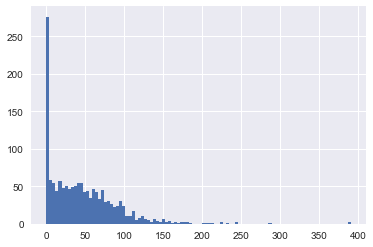

In [31]:


dg.precipitation_amt_mm.hist(bins=100)

Clearly,the distribution is not normal.
We will have to do some manipulations to get a normal data out of it. Also,
it looks like there is outlier in the frequency at left end

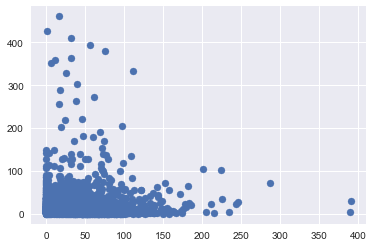

In [32]:

plt.scatter(dg['precipitation_amt_mm'],dg['total_cases'])

Look at the plot. We had assumed that high value of total_cases should occur corresponding to more rain. But the scatter plot is telling something completely different.There could be a possible explanation that most of the population is lying below 100 and so are the large values of total_cases.

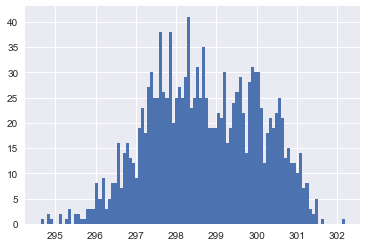

In [33]:
dg.reanalysis_air_temp_k.hist(bins=100)
#the shape of data is almost normal

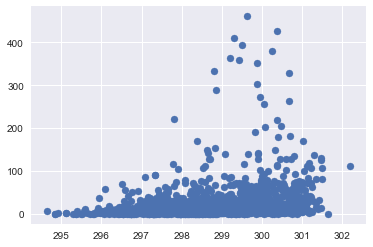

In [34]:

plt.scatter(dg['reanalysis_air_temp_k'],dg['total_cases'])

Most of the high values of total_cases correspond to high air temperature inspite of having good amount of data points in other intervals. It supports our hypothesis that large values of total_cases should correspond to higher temperature.
Now, let's jump at average temperature.

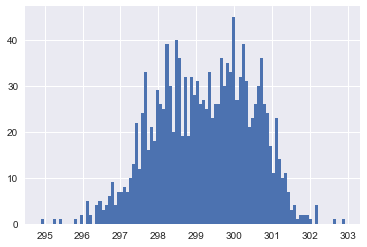

In [35]:
#again almost normal distribution
dg.reanalysis_avg_temp_k.hist(bins=100)

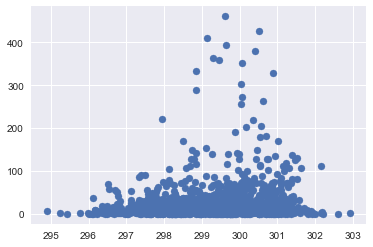

In [36]:
plt.scatter(dg['reanalysis_avg_temp_k'],dg['total_cases'])

Clearly, most of the times large values of total_cases are corresponding to high air temperature. Hence, our hypothesis about temperaure is verifeid. 
Since both the variables reanalysis_avg_temp_k and reanalysis_air_temp_k represent temperature in some way, it is highly likely that they should be correlated to a handsome extent. Let's find it out.


In [37]:
dg['reanalysis_avg_temp_k'].corr(dg['reanalysis_air_temp_k'],method='pearson',min_periods=None)

0.90177744471676946

Clearly, there is whopping 0.9 correlation which suggests that our intuition was true. You can do the same with other variables whom you feel that they could be correlated. Also, we will not treat those upcoming temperature variables very rigorously because which seem intuitively highly correlated. The reason is that if both the variables are very highly correlated, they would tend to show almost same behaviour in plots. Let me show you in a scatter plot.

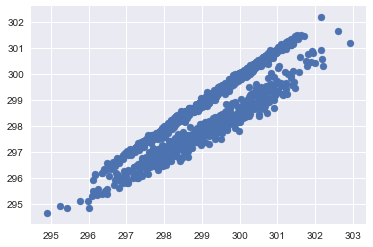

In [38]:
plt.scatter(dg.reanalysis_avg_temp_k,dg.reanalysis_air_temp_k)

Also, station_avg_temp_k and reanalysis_avg_temp_k should be correlated. Lets check it with scatter plot.

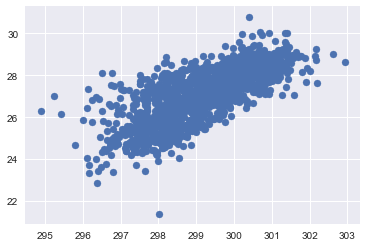

In [39]:
plt.scatter(dg.reanalysis_avg_temp_k,dg.station_avg_temp_c)

There is clear correlation between the two variables. You can get the correlation by using .corr() method as illustrated already.

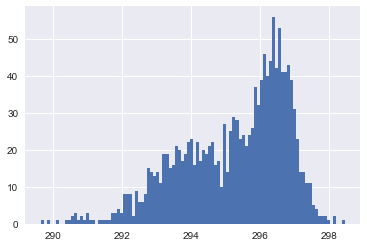

In [40]:
#skewed distribution. 
dg.reanalysis_dew_point_temp_k.hist(bins=100)

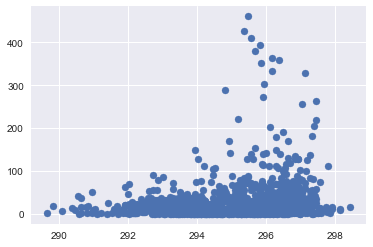

In [41]:
#maximum total_cases have occurre in between 295-297

plt.scatter(dg['reanalysis_dew_point_temp_k'],dg['total_cases'])

Bivariate analysis between independent variables is a very common and useful practice. It avails information about possibility of some sort of relationship between the variables. 
If you are have some prior knowledge of basic physical chemistry, You can relate to the fact that dew point temperature and relative humidity percent and specific humidity. Have a look 

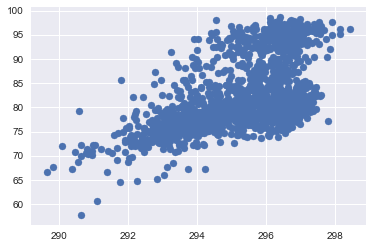

In [42]:
plt.scatter(dg.reanalysis_dew_point_temp_k,dg.reanalysis_relative_humidity_percent)

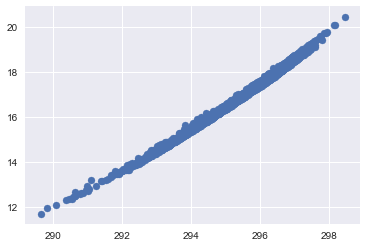

In [43]:
plt.scatter(dg.reanalysis_dew_point_temp_k,dg.reanalysis_specific_humidity_g_per_kg)

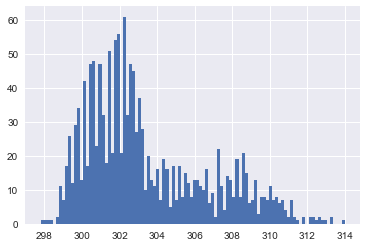

In [44]:
#skewed distribution
dg.reanalysis_max_air_temp_k.hist(bins=100)

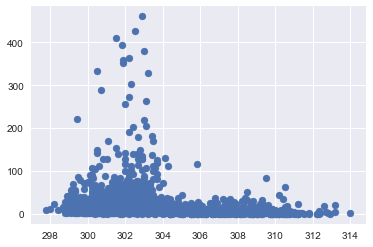

In [45]:

plt.scatter(dg['reanalysis_max_air_temp_k'],dg['total_cases'])

Note that maximum air temperature of air is not contributing to our hypothesis that growing temperature increases the chances of dengue. The possible reason could be that maxima is generally  achieved for a short duration of time and not for a long time. May be, the virus does not get affected significantly in short period and some how survives it.

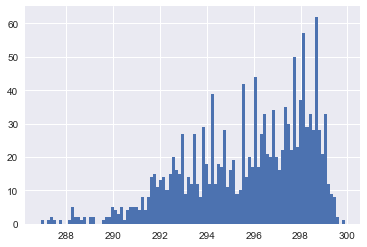

In [46]:
#skewed distribution

dg.reanalysis_min_air_temp_k.hist(bins=100)

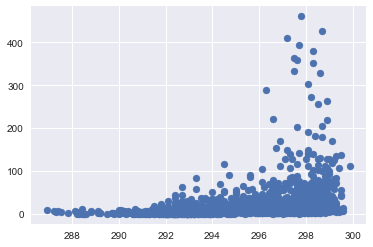

In [47]:

plt.scatter(dg['reanalysis_min_air_temp_k'],dg['total_cases'])

Again high number of cases are occuring at higher minimum temperature supporting our hypothesis.

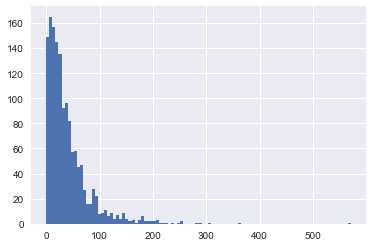

In [48]:
#highly right skewed data
dg.reanalysis_precip_amt_kg_per_m2.hist(bins=100)

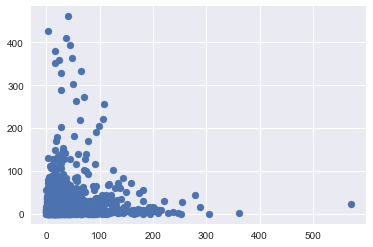

In [49]:
#most of the large number of cases have occured between 0-100. again, maximum number of the times, precip has been in 
#the same region. so no sense in relating directly.
plt.scatter(dg['reanalysis_precip_amt_kg_per_m2'],dg['total_cases'])

As earlier in case of rain, most of the population is lying below a certain value and so are the large values of total_cases. Hence, we are unable to say anything clearly about our hypothesis.

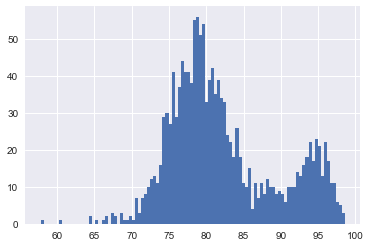

In [50]:
#not a normal distribution 
dg.reanalysis_relative_humidity_percent.hist(bins=100)

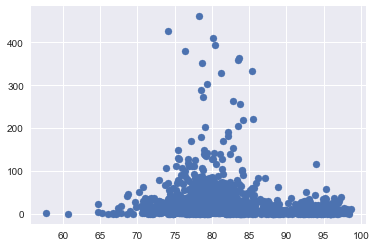

In [51]:

plt.scatter(dg['reanalysis_relative_humidity_percent'],dg['total_cases'])

The case of relative humidity is similar to rain with a difference. There is a good amount of population between the range 90 to 100 but there large values of total_cases is not seen there. It means our hypothesis is not completely true that greater the relative humidity, higher the number of cases. Next case is of rain which we already have seen. So, I will write
the code but skip the explanation.

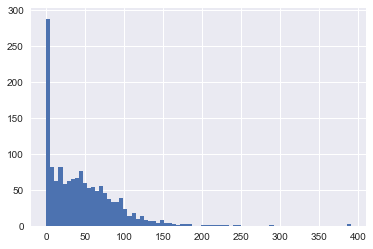

In [52]:
#not a normal distribution
dg.reanalysis_sat_precip_amt_mm.hist(bins=75)

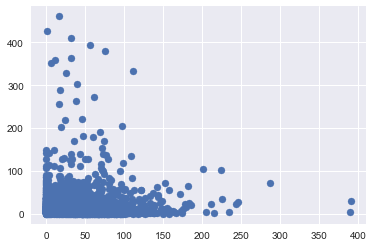

In [53]:
plt.scatter(dg['reanalysis_sat_precip_amt_mm'],dg['total_cases'])

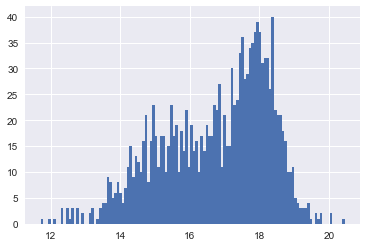

In [54]:
dg.reanalysis_specific_humidity_g_per_kg.hist(bins=120)

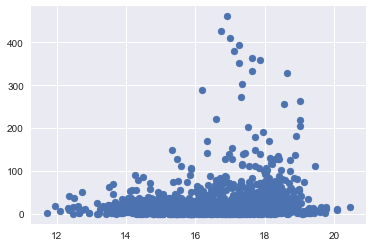

In [55]:

plt.scatter(dg['reanalysis_specific_humidity_g_per_kg'],dg['total_cases'])

Large number of cases when humidity is in between 16-19. Although, there is a good fraction of data points lie in intervals other than this range. Hence, we can infer that number of cases increase with humidity.

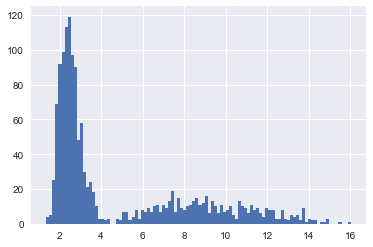

In [56]:
# not a normal plot 
dg.reanalysis_tdtr_k.hist(bins=100)

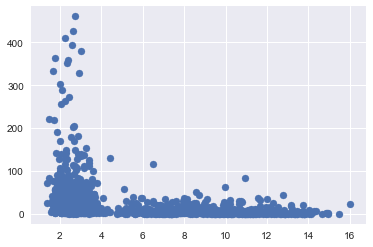

In [57]:

plt.scatter(dg['reanalysis_tdtr_k'],dg['total_cases'])

Distribution as well as large value of total_cases both lie mostly between 2-4. Also, there are signifcant data points between 6 and 12 but no large values are present in the range. Contrary to this, we had assumed that higher temperature range will lead to more number of cases.Hence, we have conflict between hypothesis and result.

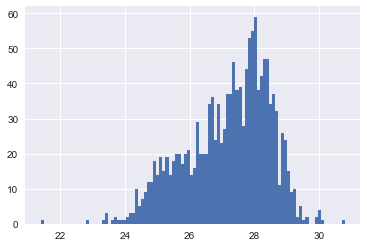

In [58]:
#a bit left skewed
#most of the times temperature is around 24-29 degree celsius.
#
dg.station_avg_temp_c.hist(bins=100)

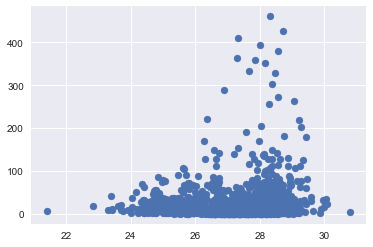

In [59]:
"""total_cases are largest when avg temperature is between 26-29
"""

plt.scatter(dg['station_avg_temp_c'],dg['total_cases'])

Although there are significant number of data points in the range 24-26, most of the large values of total_cases lies between 26-29. This somewhat supports our hypothesis that higher temperature will lead to larger values of total_cases.

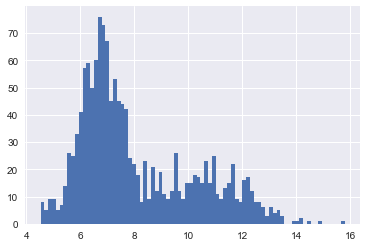

In [60]:
# not normal distribution. temperature variation is diverse.

dg.station_diur_temp_rng_c.hist(bins=80)

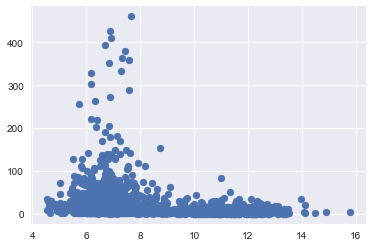

In [61]:
"""total_cases is high mostly when the temperature variation is in between 6-8 degree celsisus."""
plt.scatter(dg['station_diur_temp_rng_c'],dg['total_cases'])

Again the same thing as I had stated in case of reanalysis_tdtr_k.

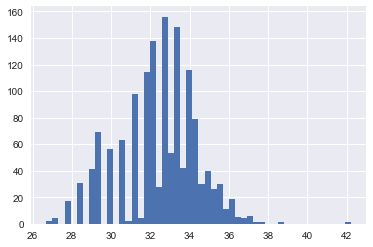

In [62]:
#somewhat normal
dg.station_max_temp_c.hist(bins=50)

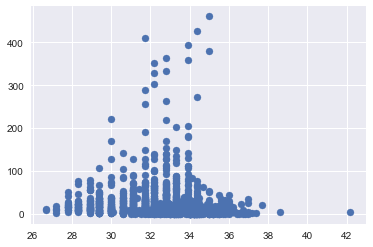

In [63]:
# large number of cases have happened when max temperature is in the range 32-35.
plt.scatter(dg['station_max_temp_c'],dg['total_cases'])

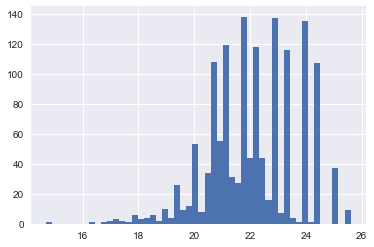

In [64]:
#not a normal distribution

dg.station_min_temp_c.hist(bins=50)

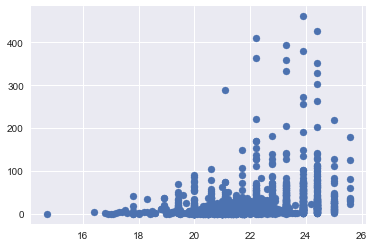

In [65]:
plt.scatter(dg['station_min_temp_c'],dg['total_cases'])

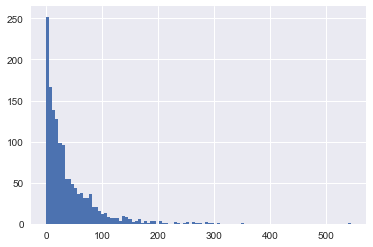

In [66]:
#not normal
# total prec. is less than 100 most of the times.
dg.station_precip_mm.hist(bins=100)

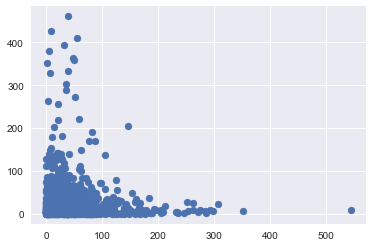

In [67]:

plt.scatter(dg['station_precip_mm'],dg['total_cases'])

Large number of cases happened when station prec. is in between 0 and 100. But there is another logic possible that most of the times prec. is less than 100. So, we can't make any inference from above plots.
Later in this article, I will give a correlation chart between each variable. In case you feel that there could be possible correlation between any two variables, you should scroll down to refer or should write code as already mentioned. 

After so many plots and commands, finally we are done with applying univariate and bivariate  analysis to test our hypothesis. There is a lot more study possible as is always obvious. But for now, we will restrict ourselves here and move forward with other aspects of data exploration.

The next thing is checking if there are missing values. It's a really important step and must be performed before applying machine learning algorithms. Below, I will print the total number of missing values in each
column.

In [68]:
#checkimg for null values. almost all the independent features have missing
#values.you can note that feature ndvi_ne 
#has exceptionally high number of missing values. we will impute the null values in later stages of model building.
dg.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

 Have a look again at the original data frame 'dg'. If you run regression   on this data frame, error message will pop up because of null values. Try doing this and see what happens.

So, before we apply linear regression, let's impute the missing values. There are various methods to do it depending upon the probelm and nature of variable. For now, I will impute NaN with the mean of that particular column.

In [69]:
dg['reanalysis_avg_temp_k'].describe()

count    1446.000000
mean      299.225578
std         1.261715
min       294.892857
25%       298.257143
50%       299.289286
75%       300.207143
max       302.928571
Name: reanalysis_avg_temp_k, dtype: float64

In [70]:
impu1 = dg['reanalysis_avg_temp_k'].mean()
impu1

299.2255779490293

In [71]:
dg['reanalysis_avg_temp_k']=dg['reanalysis_avg_temp_k'].fillna(impu1)

In [72]:
impu2 = np.mean(dg.reanalysis_dew_point_temp_k)
impu2

295.2463564512937

In [73]:
dg.reanalysis_dew_point_temp_k = dg.reanalysis_dew_point_temp_k.fillna(impu2)

In [74]:
impu3 = np.mean(dg.reanalysis_max_air_temp_k)

In [75]:
dg.reanalysis_max_air_temp_k = dg.reanalysis_max_air_temp_k.fillna(impu3)

In [76]:
impu4 = np.mean(dg.reanalysis_min_air_temp_k) 

In [77]:
dg.reanalysis_min_air_temp_k = dg.reanalysis_min_air_temp_k.fillna(impu4)

In [78]:
impu5 = np.mean(dg.reanalysis_precip_amt_kg_per_m2)

In [79]:
dg.reanalysis_precip_amt_kg_per_m2 = dg.reanalysis_precip_amt_kg_per_m2.fillna(impu5)                

In [80]:
impu6 = np.mean(dg.reanalysis_relative_humidity_percent)

In [81]:
dg.reanalysis_relative_humidity_percent=dg.reanalysis_relative_humidity_percent.fillna(impu6)

In [82]:
impu7 = np.mean(dg.reanalysis_sat_precip_amt_mm)

In [83]:
dg.reanalysis_sat_precip_amt_mm = dg.reanalysis_sat_precip_amt_mm.fillna(impu7)                        

In [84]:
impu8 = dg.station_min_temp_c.mean()  

In [85]:
dg.station_min_temp_c = dg.station_min_temp_c.fillna(impu8)

In [86]:
impu9 = dg.station_precip_mm.mean()                       

In [87]:
dg.station_precip_mm = dg.station_precip_mm.fillna(impu9)                                             

In [88]:
impu10=dg.ndvi_ne.mean()

In [89]:
dg.ndvi_ne = dg.ndvi_ne.fillna(impu10)

In [90]:
impu11=dg.ndvi_nw.mean()

In [91]:
dg.ndvi_nw = dg.ndvi_nw.fillna(impu11)

In [92]:
impu12 = dg.ndvi_nw.mean()

In [93]:
dg.ndvi_se = dg.ndvi_se.fillna(impu12)

In [94]:
impu13 = dg.ndvi_sw.mean()

In [95]:
dg.ndvi_sw = dg.ndvi_sw.fillna(impu13)

I have chose which column to imput strategically. I have not imputed some of the columns because I want to drop those columns based on corelation. If you are familiar with linear regression, you should know that corelation causes hinderance in proper functioning of linear regression. 
Next, are you wondering how I decided which columns to drop? I have taken a correlation of about 0.75 as highly correlated columns and have picked columns suitably to drop. Let's see how?

In [96]:
dg.drop(['reanalysis_air_temp_k','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','precipitation_amt_mm'],axis=1,inplace = True)

In [97]:
dg.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,23.9,5.8,6


We have almost prepared our data for first algorithm. But before proceeding further, double check if still there are missing values because precaution is better than cure and in case of coding, debugging is the worst nightmare you can think of.


In [98]:
dg.isnull().sum()

city                                    0
year                                    0
weekofyear                              0
week_start_date                         0
ndvi_ne                                 0
ndvi_nw                                 0
ndvi_se                                 0
ndvi_sw                                 0
reanalysis_avg_temp_k                   0
reanalysis_dew_point_temp_k             0
reanalysis_max_air_temp_k               0
reanalysis_min_air_temp_k               0
reanalysis_precip_amt_kg_per_m2         0
reanalysis_relative_humidity_percent    0
reanalysis_sat_precip_amt_mm            0
station_min_temp_c                      0
station_precip_mm                       0
total_cases                             0
dtype: int64

As you can see, there are no missing values in the modified data set. We can proceed with this data frame and run linear regression. But before that, we will have to drop the target variable because in sklearn library, the linear regression function treats each variable passed in training features as training data unlike R.

In [99]:
dg.drop('total_cases',axis=1,inplace=True)

This will be the final dataframe which we will be using in our model. 
Let's prepare our target variable. In next cell, I have just imported the label file and dropped all the columns except target variable to prepare it for applying  in linear regression.


In [100]:
ab = pd.read_csv("C:/Users/HP/Desktop/dengue_labels_train.csv")
ab.drop(['city','year','weekofyear'],axis=1,inplace=True)

In [101]:
ab.head()

,total_cases
0,4
1,5
2,4
3,3
4,6


In [102]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 1 columns):
total_cases    1456 non-null int64
dtypes: int64(1)
memory usage: 11.5 KB


Since we want to run linear regression, we should keep only those variables which really affect
the dependent variable. For example, in our present case the name of city does not affect the outcome sinificantly. So I will drop the city column before feeding our data frame in ragression function. City would have been important if we just had several cities or states and number of cases in each city as our data set. Similarly, you can think of date of start of week and year. So, I will drop these columns from data frame 'dg'. 

In [103]:
dg.drop(['city','week_start_date','year'],axis=1,inplace=True)


After such a long fight in analysing and preparing data, We are ready to make our first predictive model. Excited! Here we go.

In [104]:
import sklearn as skl
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In the above cell, I have imported the necessary libraries and functions for making our regression model. Note that I have not treated outliers in the data. Also, I have not made skewed distributions normal. This model is just a preliminary model.
One further note, if you can't get the linear regrerssion code for now don't worry. Our purpose is to explore and prepare data for any kind of machine learning algorithm.

In [105]:
rgr = linear_model.LinearRegression()

In the next line, I will split the data set into training set 'x' and validation set 'y'. 

In [106]:
x_train,y_train,x_test,y_test = train_test_split(dg,ab,test_size=0.2,random_state=4)

In [107]:
rgr.fit(x_train,x_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Done with linear regression! Let's look at the parameters. Yes, you have finally got those magical parameters. Can't believe? Go ahead and have a look.

In [108]:
rgr.coef_

array([[  6.39974973e-01,   1.63759261e+01,   2.35746515e+01,
         -1.41329793e+02,   9.89121296e+01,  -1.44093304e+01,
          1.44166326e+01,   2.65522666e-02,   2.25125658e+00,
          1.97095878e-02,  -2.91055411e+00,  -3.70371413e-02,
          3.88200554e-01,   1.39741550e-03]])

Now, the time to make predictions. Here we go!

In [109]:
#predictions by model
predictions = rgr.predict(y_train)

In [110]:
predictions


array([[ 28.33548465],
       [  0.8316522 ],
       [ 50.26451187],
       [ 12.56090276],
       [ 46.97795671],
       [ 32.38534901],
       [ 43.15828056],
       [ 41.86124673],
       [ 15.70231329],
       [ 19.78576806],
       [ -1.29385505],
       [ 32.28579182],
       [ 21.80592029],
       [ 26.0587137 ],
       [ 23.51028308],
       [ 24.51868749],
       [ 16.11036445],
       [ 40.78442883],
       [ 24.48473253],
       [ 12.46060244],
       [ -3.82038886],
       [ 52.24223791],
       [ 33.29823164],
       [ 39.03195545],
       [  5.52033646],
       [ 16.02147858],
       [ 44.09265449],
       [ 37.68071526],
       [ -6.31524101],
       [ 49.18649373],
       [ -3.0476993 ],
       [ 55.46569645],
       [ 15.13337337],
       [ 51.30832877],
       [ 54.17155116],
       [  5.0228478 ],
       [-18.95767313],
       [ -0.38402352],
       [ 51.21714871],
       [ 10.24722528],
       [-21.83537293],
       [ 12.14647398],
       [ 27.59219153],
       [ 26


Let me print the validation test array for you to cross check.

In [111]:
y_test

,total_cases
574,8
1003,0
132,34
1302,1
436,54
885,8
133,47
588,35
1327,58
832,3


Finally, it's time for evaluation of our predictions. 

In [112]:
mse = np.mean((predictions-y_test)**2)

In [113]:
rmse = np.sqrt(mse)
rmse/1.41

total_cases    30.943644
dtype: float64

In [114]:
np.sqrt(np.mean((rgr.predict(x_train)-x_test)**2)/2)

total_cases    27.435875
dtype: float64

In [115]:
reg_ridge = linear_model.Ridge (alpha = .001,normalize=True)

In [116]:
reg_ridge.fit(x_train,x_test)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [117]:
reg_ridge.coef_

array([[  6.44311055e-01,   1.59512828e+01,   2.32955081e+01,
         -1.40478742e+02,   9.81065674e+01,  -1.29201568e+01,
          1.29359709e+01,  -2.22900839e-01,   2.31134220e+00,
          2.02672936e-02,  -2.62939896e+00,  -3.63890217e-02,
          4.82479358e-01,   8.30049651e-04]])

In [118]:
predictions_ridge=reg_ridge.predict(y_train)

In [119]:
np.sqrt(np.mean((reg_ridge.predict(x_train)-x_test)**2)/2)

total_cases    27.436895
dtype: float64